# PANDAS PART 2

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({
    "A":5.6,
    "B":pd.date_range("2004-07-18",periods=5),
    "C":pd.Series([1,2,8,4,5],index=list("12345")),
    "D":pd.Categorical(["test","train","train","testing","training"])
    
},index=list("12345"),columns=list("ABCD"))
df

,A,B,C,D
1,5.6,2004-07-18,1,test
2,5.6,2004-07-19,2,train
3,5.6,2004-07-20,8,train
4,5.6,2004-07-21,4,testing
5,5.6,2004-07-22,5,training


# Boolean indexing

In [3]:
print(df["C"]>4)
print(df[df["C"]>4])

1    False
2    False
3     True
4    False
5     True
Name: C, dtype: bool
     A          B  C         D
3  5.6 2004-07-20  8     train
5  5.6 2004-07-22  5  training


In [4]:
#.copy()
df1=df.copy()
df1["E"]=["one", "two", "three", "four","five"] 
#new column is created
print(df1)

     A          B  C         D      E
1  5.6 2004-07-18  1      test    one
2  5.6 2004-07-19  2     train    two
3  5.6 2004-07-20  8     train  three
4  5.6 2004-07-21  4   testing   four
5  5.6 2004-07-22  5  training   five


In [5]:
#isin()
df1[df1["E"].isin(["one"])]

,A,B,C,D,E
1,5.6,2004-07-18,1,test,one


# Setting

In [6]:
s1 = pd.Series([1, 24, 32, 46,75], index=list("12345"))

df["E"]=s1
df

,A,B,C,D,E
1,5.6,2004-07-18,1,test,1
2,5.6,2004-07-19,2,train,24
3,5.6,2004-07-20,8,train,32
4,5.6,2004-07-21,4,testing,46
5,5.6,2004-07-22,5,training,75


In [7]:
# Setting values by label
df.at[1,"A"]=5.5
df.at[10,"A"]=5
df.at[2,"A"]=5.8
df

,A,B,C,D,E
1,5.6,2004-07-18,1.0,test,1.0
2,5.6,2004-07-19,2.0,train,24.0
3,5.6,2004-07-20,8.0,train,32.0
4,5.6,2004-07-21,4.0,testing,46.0
5,5.6,2004-07-22,5.0,training,75.0
1,5.5,NaT,NaN,NaN,NaN
10,5.0,NaT,NaN,NaN,NaN
2,5.8,NaT,NaN,NaN,NaN


In [8]:
# Setting values by position
df.iat[3,1]=8.4
df.iat[3,4]=8.4
df

,A,B,C,D,E
1,5.6,2004-07-18 00:00:00,1.0,test,1.0
2,5.6,2004-07-19 00:00:00,2.0,train,24.0
3,5.6,2004-07-20 00:00:00,8.0,train,32.0
4,5.6,8.4,4.0,testing,8.4
5,5.6,2004-07-22 00:00:00,5.0,training,75.0
1,5.5,NaT,NaN,NaN,NaN
10,5.0,NaT,NaN,NaN,NaN
2,5.8,NaT,NaN,NaN,NaN


In [9]:
df.loc[:,"E"]=np.array([5]*len(df))
df

C:\Users\heman\AppData\Local\Temp\ipykernel_25372\2153832009.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"E"]=np.array([5]*len(df))


,A,B,C,D,E
1,5.6,2004-07-18 00:00:00,1.0,test,5
2,5.6,2004-07-19 00:00:00,2.0,train,5
3,5.6,2004-07-20 00:00:00,8.0,train,5
4,5.6,8.4,4.0,testing,5
5,5.6,2004-07-22 00:00:00,5.0,training,5
1,5.5,NaT,NaN,NaN,5
10,5.0,NaT,NaN,NaN,5
2,5.8,NaT,NaN,NaN,5


# Missing data

In [10]:
#fillna() =>fill null with mean...
#dropna() =>remove null
#isna() =>check is null

In [11]:
pd.isna(df)

,A,B,C,D,E
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
1,False,True,True,True,False
10,False,True,True,True,False
2,False,True,True,True,False


In [12]:
df.sum().isna()

C:\Users\heman\AppData\Local\Temp\ipykernel_25372\1949428304.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum().isna()


A    False
C    False
E    False
dtype: bool

In [13]:
df["C"].dropna()

1    1.0
2    2.0
3    8.0
4    4.0
5    5.0
Name: C, dtype: float64

In [14]:
df["C"].fillna(0)
df

,A,B,C,D,E
1,5.6,2004-07-18 00:00:00,1.0,test,5
2,5.6,2004-07-19 00:00:00,2.0,train,5
3,5.6,2004-07-20 00:00:00,8.0,train,5
4,5.6,8.4,4.0,testing,5
5,5.6,2004-07-22 00:00:00,5.0,training,5
1,5.5,NaT,NaN,NaN,5
10,5.0,NaT,NaN,NaN,5
2,5.8,NaT,NaN,NaN,5


# Operations

In [15]:
df["A"].mean()

5.5375

In [16]:
# df.mean(axis=1)

In [17]:
df["C"].median()

4.0

In [18]:
#shift =>move element in series
print(pd.Series([1, 3, 5, np.nan, 6, 8]))
print(pd.Series([1, 3, 5, np.nan, 6, 8]).shift(2))
s=pd.Series([1, 3, 5, np.nan, 6, 8]).shift(2)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
0    NaN
1    NaN
2    1.0
3    3.0
4    5.0
5    NaN
dtype: float64


In [19]:
# sub => subract (row or column)

In [20]:
df["E"].sub(s, axis="index")

0     NaN
1     NaN
2     4.0
3     NaN
4     NaN
5     NaN
10    NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
dtype: float64

In [21]:
#agg is an alias for aggregate

In [22]:
df.agg('sum',axis="columns")

C:\Users\heman\AppData\Local\Temp\ipykernel_25372\1423552456.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.agg('sum',axis="columns")


1     10.5
10    10.0
2     10.8
dtype: object

In [23]:
df["C"].agg(['sum', 'min','max'])

sum    20.0
min     1.0
max     8.0
Name: C, dtype: float64

In [24]:
df.agg({'A' : ['sum', 'min'], 'C' : ['min', 'max']})

,A,C
sum,44.3,NaN
min,5.0,1.0
max,NaN,8.0


In [25]:
# Applies a function to each value (element) in a DataFrame.
# Often used for group-wise transformations, but can also be applied to the whole DataFrame.

In [26]:
df["C"].transform(lambda x: x + 1)

1     2.0
2     3.0
3     9.0
4     5.0
5     6.0
1     NaN
10    NaN
2     NaN
Name: C, dtype: float64

In [27]:
s1=pd.Series(np.random.randint(0,8,size=12))
print(s1)
s1.value_counts()
# count number of occurrence 

0     7
1     6
2     0
3     3
4     2
5     2
6     7
7     4
8     2
9     5
10    1
11    4
dtype: int32


2    3
7    2
4    2
6    1
0    1
3    1
5    1
1    1
dtype: int64

In [28]:
df.groupby("D").sum()
df.groupby("D")[["A","C"]].sum()

C:\Users\heman\AppData\Local\Temp\ipykernel_25372\1267160968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("D").sum()


,A,C
D,,
test,5.6,1.0
testing,5.6,4.0
train,11.2,10.0
training,5.6,5.0


In [29]:
pd.pivot_table(df,values="D",index=['C'])



C:\Users\heman\AppData\Local\Temp\ipykernel_25372\3834935483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.pivot_table(df,values="D",index=['C'])


""
C
1.0
2.0
4.0
5.0
8.0


In [30]:
df3=pd.DataFrame({
    "id":[1,2,4,5,6,7],"raw":["A","E","W","E","A","D"]
})
df3

,id,raw
0,1,A
1,2,E
2,4,W
3,5,E
4,6,A
5,7,D


In [31]:
df3["grade"]=df3["raw"].astype("category")
print(df3)
df3.dtypes

   id raw grade
0   1   A     A
1   2   E     E
2   4   W     W
3   5   E     E
4   6   A     A
5   7   D     D


id          int64
raw        object
grade    category
dtype: object

In [34]:
df3.groupby("grade", observed=False).size()

grade
A    2
D    1
E    2
W    1
dtype: int64

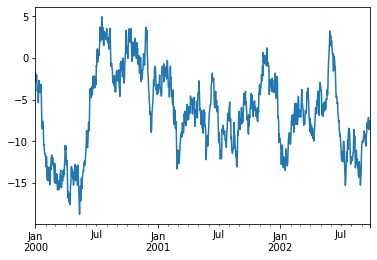

In [35]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();